# Cohort 240: RUO 2022 vs MMK 2024 comparison

### Imports and environment setup

- Date of run: 2024-09-19
- Environment: python 3.12
- Packages required: pandas, numpy, sklearn, statsmodels, seaborn, matplotlib

In [1]:
# Include in the environment the code directory with the utils function
import sys
sys.path.append('../code/')

In [2]:
# Library imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Utils imports
import cohort_analysis_utils as utils

In [3]:
# Remove warnings for readability
import warnings
warnings.filterwarnings('ignore')

# Remove cell printing limits
pd.set_option('display.max_rows', None)

In [4]:
# Some constants
RESULTS_PATH_RUO = '../data/results/240/'
RESULTS_PATH_MMK = '../data/results/240_MMK_2024/'

BIOMARKERS_240_MMK = ['MMP9_MMK', 'HSPB1_MMK', 'PERM_MMK', 'AGRIN_MMK', 'KPYM_MMK']
BIOMARKERS_240_RUO = ['MMP9_RUO', 'HSPB1_RUO', 'PERM_RUO']

# Data loading and preprosessing

In [5]:
df_240_mmk_2024 = pd.read_csv('../data/mmk_240_20240925.csv', sep=',', index_col=0, header=0)

# Harmonization of column names
df_240_mmk_2024 = utils.normalize_column_names(df_240_mmk_2024)
df_240_mmk_2024.columns = [col.replace('_MIMARK', '_MMK') for col in df_240_mmk_2024.columns]

# Ensure numeric columns are treated as such
cols_to_num = ['TP_2022', 'AGRIN_MMK', 'KPYM_MMK', 'HSPB1_MMK',
                   'PERM_MMK', 'MMP9_MMK', 'TP_2024']
df_240_mmk_2024 = utils.cols_as_numbers(df_240_mmk_2024, cols_to_num)

# Rename Condition column to Pathology
df_240_mmk_2024.rename(columns={'Condition': 'Pathology'}, inplace=True)

# Ensure categorical columns are treated as such
df_240_mmk_2024 = utils.cols_as_category(df_240_mmk_2024, {'Pathology':{'Benign': 0, 'Endometrial cancer': 1}})

In [6]:
df_240_ruo_2022 = pd.read_csv('../data/ruo_240.csv', sep='\t', index_col=0, header=0)

# Harmonization of column names
df_240_ruo_2022 = utils.normalize_column_names(df_240_ruo_2022)

# Ensure numeric columns are treated as such
cols_to_num = ['Age', 'Collected_volume_mL',
                   'MMP9', 'HSPB1', 'PERM', 'Total_protein_BCA']
df_240_ruo_2022 = utils.cols_as_numbers(df_240_ruo_2022, cols_to_num)

# To harmonize comparisons with MMK data, rename these biomarkers to _RUO
df_240_ruo_2022.rename(columns={'MMP9': 'MMP9_RUO', 'PERM': 'PERM_RUO', 'HSPB1': 'HSPB1_RUO'}, inplace=True)

# Ensure categorical columns are treated as such
df_240_ruo_2022 = utils.cols_as_category(df_240_ruo_2022, {'Pathology':{'Benign': 0, 'Endometrial cancer': 1}})

# delete columns starting with ng
df_240_ruo_2022 = df_240_ruo_2022[df_240_ruo_2022.columns.drop(list(df_240_ruo_2022.filter(regex='^ng')))]



# Size of the datasets

#### Size of the RUO 2022 dataset

In [7]:
len(set(df_240_ruo_2022.index))

250

#### Size of the MMK 2024 dataset

In [8]:
len(set(df_240_mmk_2024.index))

212

Let's check if all the samples of the smaller dataset are within the bigger (full intersection).

In [9]:
len(set(df_240_ruo_2022.index) & set(df_240_mmk_2024.index))

212

They are.

# AUCs comparison

We will restrict the analysis to individual biomarkers. In the AUCs analyses notebooks is that shown no combination (up to 3) of biomarkers is performing better than the best ranked biomarker alone. 

## Direct

In [10]:
df_results_240_ruo_direct = pd.read_csv(RESULTS_PATH_RUO+'/direct/max_3.csv', sep=',', header=0)
df_results_240_ruo_direct[df_results_240_ruo_direct['Biomarker_2'].isnull() & df_results_240_ruo_direct['Biomarker_3'].isnull()][['Biomarker_1','AUC']]

,Biomarker_1,AUC
0,MMP9,0.84381
1,PERM,0.83853
6,HSPB1,0.67763


In [11]:
df_results_240_mmk_2024_direct = pd.read_csv(RESULTS_PATH_MMK+'/direct/max_3.csv', sep=',', header=0)
df_results_240_mmk_2024_direct[df_results_240_mmk_2024_direct['Biomarker_2'].isnull() & df_results_240_mmk_2024_direct['Biomarker_3'].isnull()][['Biomarker_1','AUC']]

,Biomarker_1,AUC
0,MMP9_MMK,0.81886
1,PERM_MMK,0.79498
3,KPYM_MMK,0.77424
9,AGRIN_MMK,0.73446
23,HSPB1_MMK,0.63160


## Normalized

In [12]:
df_results_240_ruo_normalized = pd.read_csv(RESULTS_PATH_RUO+'/normalized/max_3.csv', sep=',', header=0)
df_results_240_ruo_normalized[df_results_240_ruo_normalized['Biomarker_2'].isnull() & df_results_240_ruo_normalized['Biomarker_3'].isnull()][['Biomarker_1','AUC']]

,Biomarker_1,AUC
0,PERM,0.82372
1,MMP9,0.81688
6,HSPB1,0.63462


In [13]:
df_results_240_mmk_2024_normalized = pd.read_csv(RESULTS_PATH_MMK+'/normalized/max_3.csv', sep=',', header=0)
df_results_240_mmk_2024_normalized[df_results_240_mmk_2024_normalized['Biomarker_2'].isnull() & df_results_240_mmk_2024_normalized['Biomarker_3'].isnull()][['Biomarker_1','AUC']]

,Biomarker_1,AUC
0,MMP9_MMK,0.77079
5,PERM_MMK,0.73968
8,KPYM_MMK,0.71404
19,AGRIN_MMK,0.69282
24,HSPB1_MMK,0.57531


# Computing the RUO AUCs on the 207 samples present in MMK analysis

As a check that the differences in AUC is not coming from the missing samples in the MMK 2024 analysis, let's compute the AUCs in RUO 2022 using only the 207 samples over the total 250. 

In [14]:
# create a new dataframe with the rows in the RUO only present in the MMK
df_240_ruo_2022_207 = df_240_ruo_2022.loc[list(set(df_240_ruo_2022.index) & set(df_240_mmk_2024.index))]

In [15]:
RESULTS_PATH_207 = '../data/results/240_207'
NORMALIZING_COL_240_RUO = 'Total_protein_BCA' # Column to be used for normalizing the biomarkers
METHODS = ['direct', 'normalized']

In [16]:
models_120 = utils.compute_all_models_and_save(
                            df=df_240_ruo_2022_207,
                            biomarkers=BIOMARKERS_240_RUO,
                            normalizing_col=NORMALIZING_COL_240_RUO, 
                            volume_col= None,
                            apply_log=True,
                            avoid_same_biomarker=True,
                            methods=METHODS,
                            max_biomarker_count=1,
                            folder_name=RESULTS_PATH_207,
                            plot_rocs=False,
                            )

In [17]:
pd.read_csv(RESULTS_PATH_207+'/direct/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']].head(n=10)

,Biomarker_1,AUC
0,PERM_RUO,0.83320
1,MMP9_RUO,0.82999
2,HSPB1_RUO,0.68980


In [18]:
pd.read_csv(RESULTS_PATH_207+'/normalized/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']].head(n=10)

,Biomarker_1,AUC
0,PERM_RUO,0.82922
1,MMP9_RUO,0.81356
2,HSPB1_RUO,0.67661


As can be observed, the AUC values are very similar to the ones obtained originally, so the differences in AUC are not coming from the missing data in the MMK dataset.

# Readout correlations

Let's analyze for the overlapping samples how well is the correlation in both experiments.

In [19]:
# Merge df_240_ruo_2022_207 and df_240_mmk_2024 by index
df_merged = pd.merge(df_240_ruo_2022_207, df_240_mmk_2024, left_index=True, right_index=True, how='inner')

# Rename Pathology_x to Pathology and drop Pathology_y
df_merged.rename(columns={'Pathology_x': 'Pathology'}, inplace=True)
df_merged.drop(columns=['Pathology_y'], inplace=True)

for biomarker in BIOMARKERS_240_RUO:
    df_merged[biomarker+'_normalized'] = np.log(df_merged[biomarker].div(df_merged[NORMALIZING_COL_240_RUO], axis=0))

for biomarker in BIOMARKERS_240_MMK:
    df_merged[biomarker+'_normalized'] = np.log(df_merged[biomarker].div(df_merged['TP_2024'], axis=0))

for biomarker in BIOMARKERS_240_RUO + BIOMARKERS_240_MMK:
    df_merged[biomarker] = np.log(df_merged[biomarker])


## Total protein

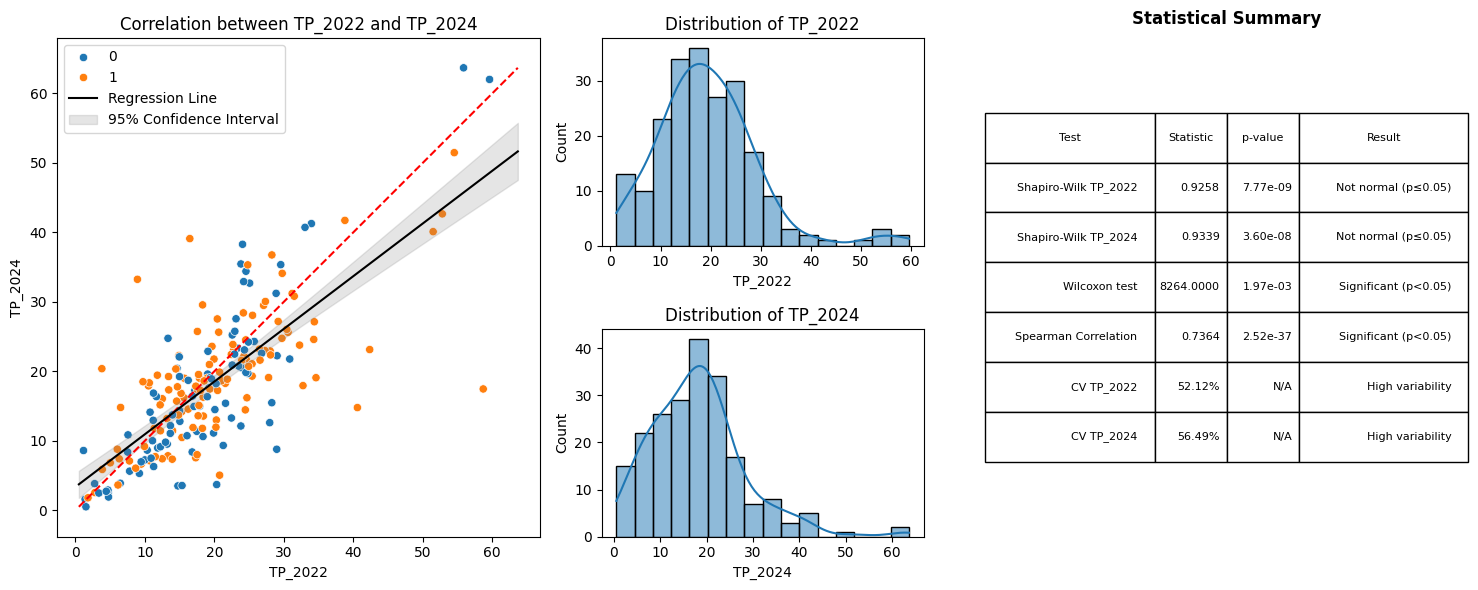

In [20]:
utils.plot_biomarker_correlation(df_merged.dropna(subset=['TP_2022', 'TP_2024']), 'TP_2022', 'TP_2024')

The total protein correlation between both experiments (Spearman) is very significant, but there is a very high variability in both Total Protein distributions. 

### Collected volume vs Total protein

We will check for independency between Collected volume and TP in order to discard that they influence each other (we don't expect correlation because of the preanalytical design)

In [21]:
df_merged['Collected_volume_mL_log'] = np.log(df_merged['Collected_volume_mL'])
df_merged['TP_2022_log'] = np.log(df_merged['TP_2022'])
df_merged['TP_2024_log'] = np.log(df_merged['TP_2024'])


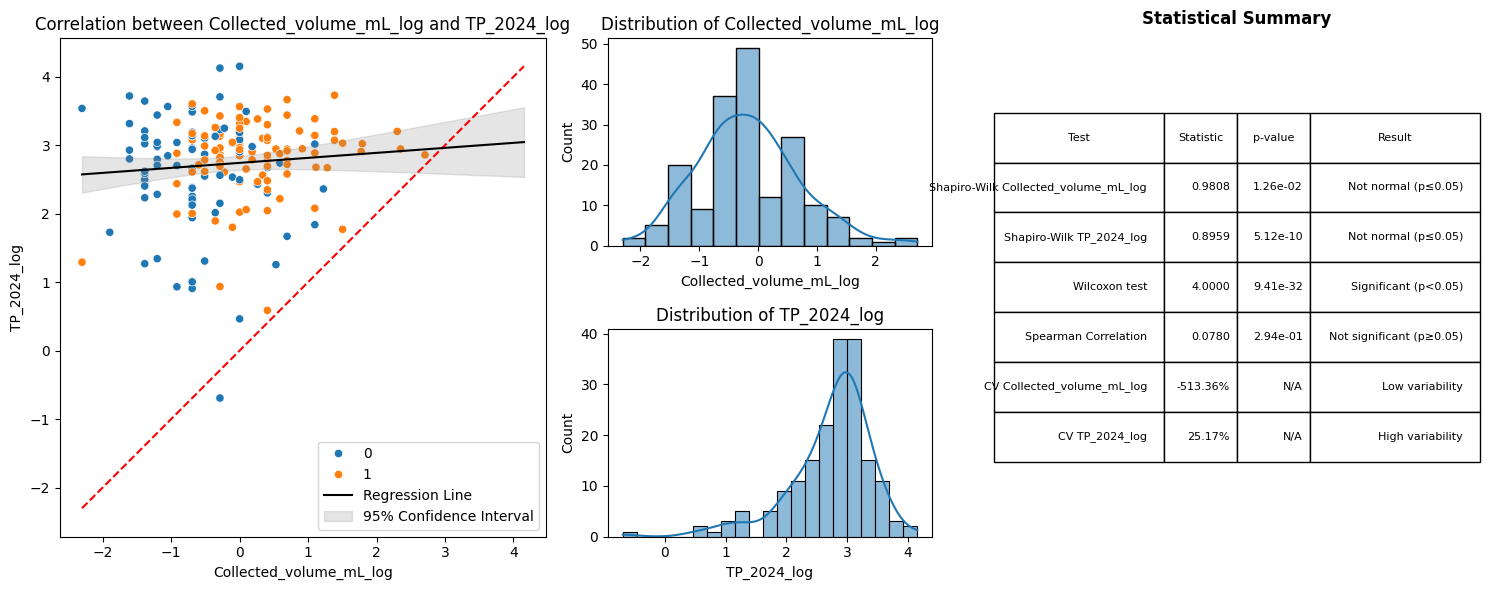

In [22]:
utils.plot_biomarker_correlation(df_merged.dropna(subset=['Collected_volume_mL_log', 'TP_2024_log']), 'Collected_volume_mL_log', 'TP_2024_log')

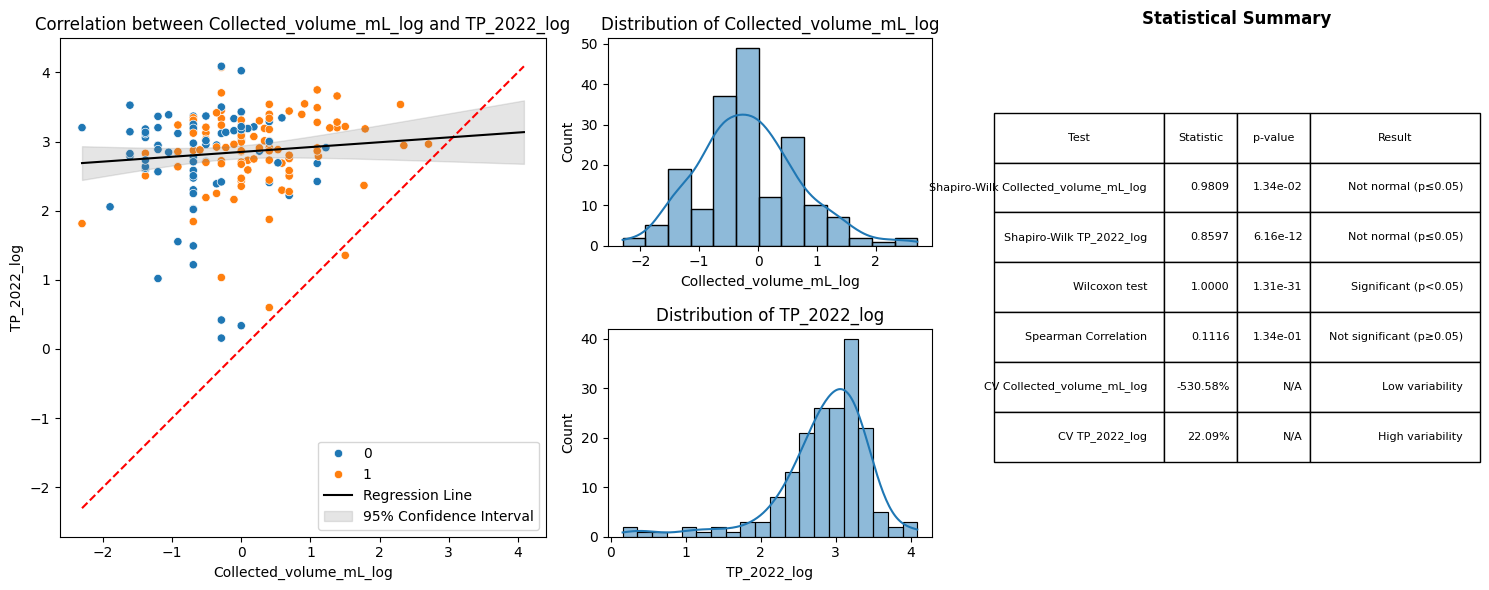

In [23]:
utils.plot_biomarker_correlation(df_merged.dropna(subset=['Collected_volume_mL_log', 'TP_2022_log']), 'Collected_volume_mL_log', 'TP_2022_log')

Nor 2022 neither 2024 total protein correlate with the collected volume, something expected.

## PERM

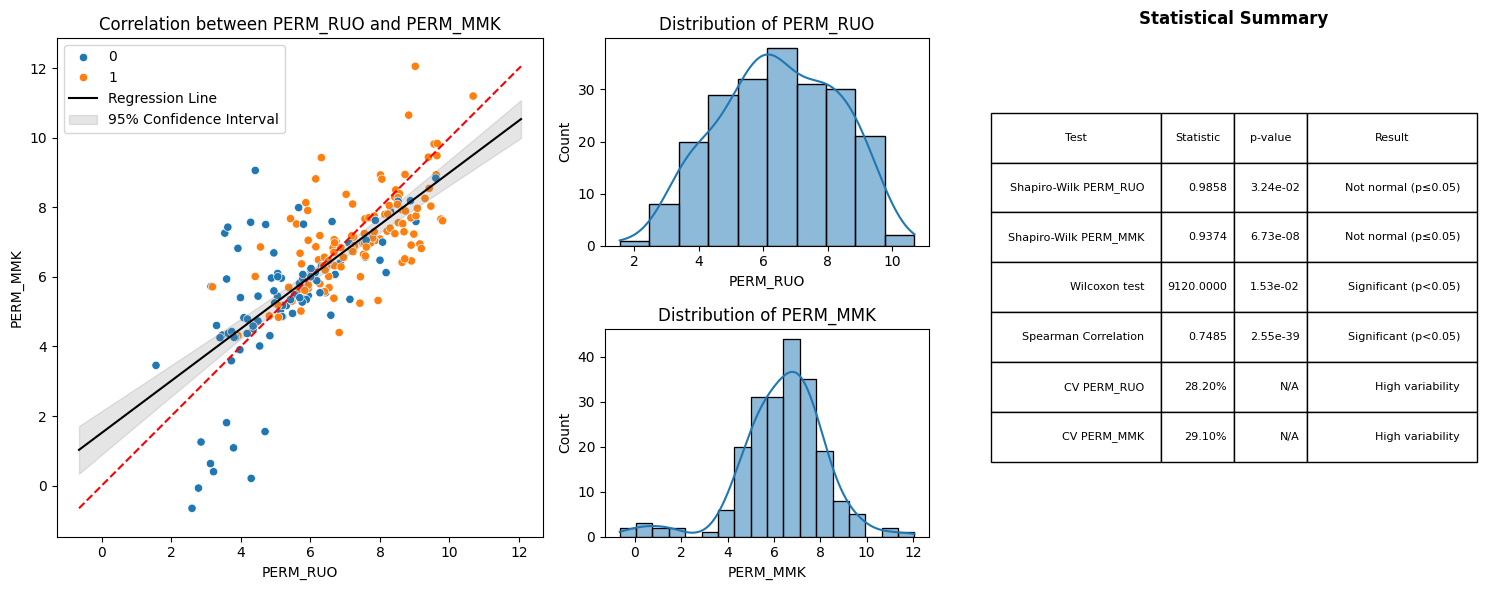

In [24]:
utils.plot_biomarker_correlation(df_merged.dropna(subset=['PERM_RUO', 'PERM_MMK']), 'PERM_RUO', 'PERM_MMK')

Here a clear set of outliers can be observed, being all of the benign condition. This should not influence the AUC because the values are lower in MMK readout. The slope being <1 is an indicator of the decrease in AUC. As with total protein, there is a significant correlation but a high variability.

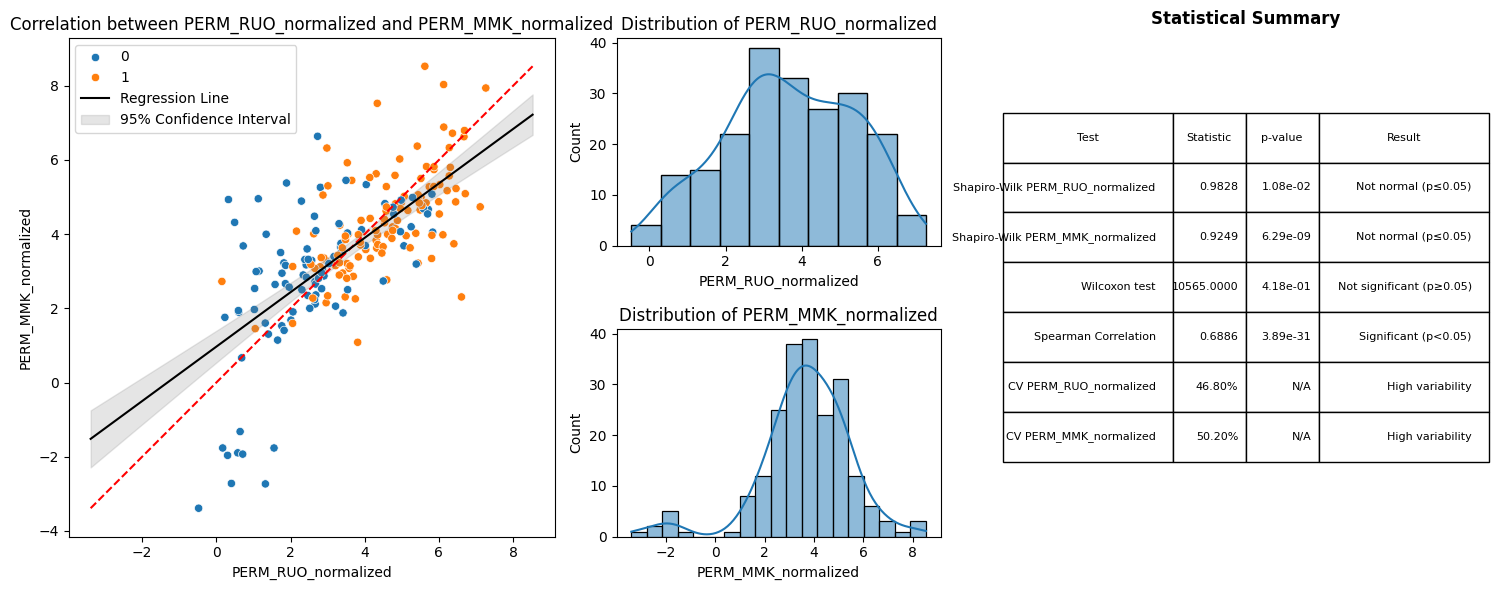

In [25]:
utils.plot_biomarker_correlation(df_merged.dropna(subset=['PERM_RUO_normalized', 'PERM_MMK_normalized']), 'PERM_RUO_normalized', 'PERM_MMK_normalized')

Analyzing the normalized version of the biomarker does not present any significant change to be remarked.

Let's list the outliers to have a record of them.

In [26]:
# @todo: use normalized values
df_merged['PERM_diff'] = df_merged['PERM_RUO_normalized']-df_merged['PERM_MMK_normalized']
df_PERM_outliers = df_merged[abs(df_merged['PERM_diff'])>2][['Pathology', 'PERM_RUO_normalized', 'PERM_MMK_normalized', 'PERM_diff']]
df_PERM_outliers.sort_values(by='PERM_diff')

,Pathology,PERM_RUO_normalized,PERM_MMK_normalized,PERM_diff
Sample,,,,
872,0,0.326912,4.934325,-4.607413
1248,0,2.730674,6.639098,-3.908425
876,0,0.494196,4.318235,-3.824039
378,0,1.131402,4.955278,-3.823876
46,0,1.893126,5.379980,-3.486853
1242,1,2.980920,6.322521,-3.341601
1021,1,4.339368,7.527896,-3.188528
837,0,0.724902,3.683481,-2.958579
1216,1,5.622272,8.527223,-2.904951


Remember these are the logarithms of the biomarker readouts. 

## MMP9

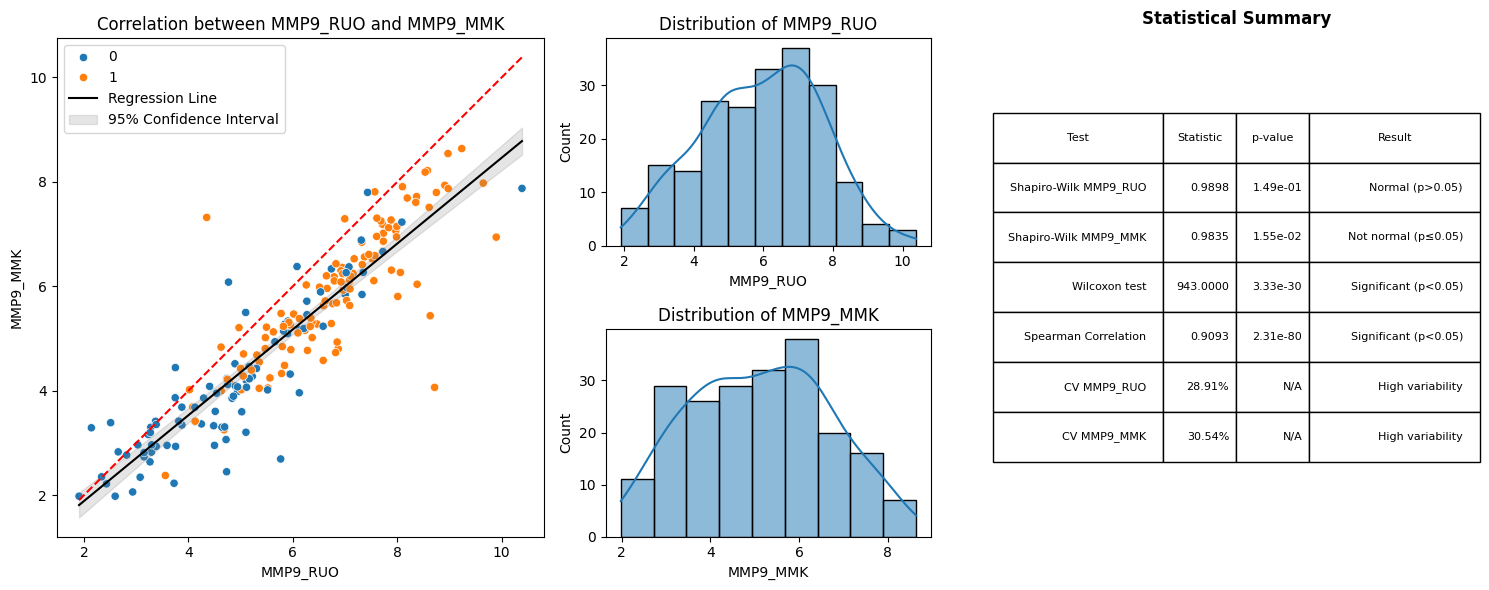

In [27]:
utils.plot_biomarker_correlation(df_merged.dropna(subset=['MMP9_RUO', 'MMP9_MMK']), 'MMP9_RUO', 'MMP9_MMK')

The slope being <1 (but bigger than the PERM slope) is an indicator in the small decrease in AUC.

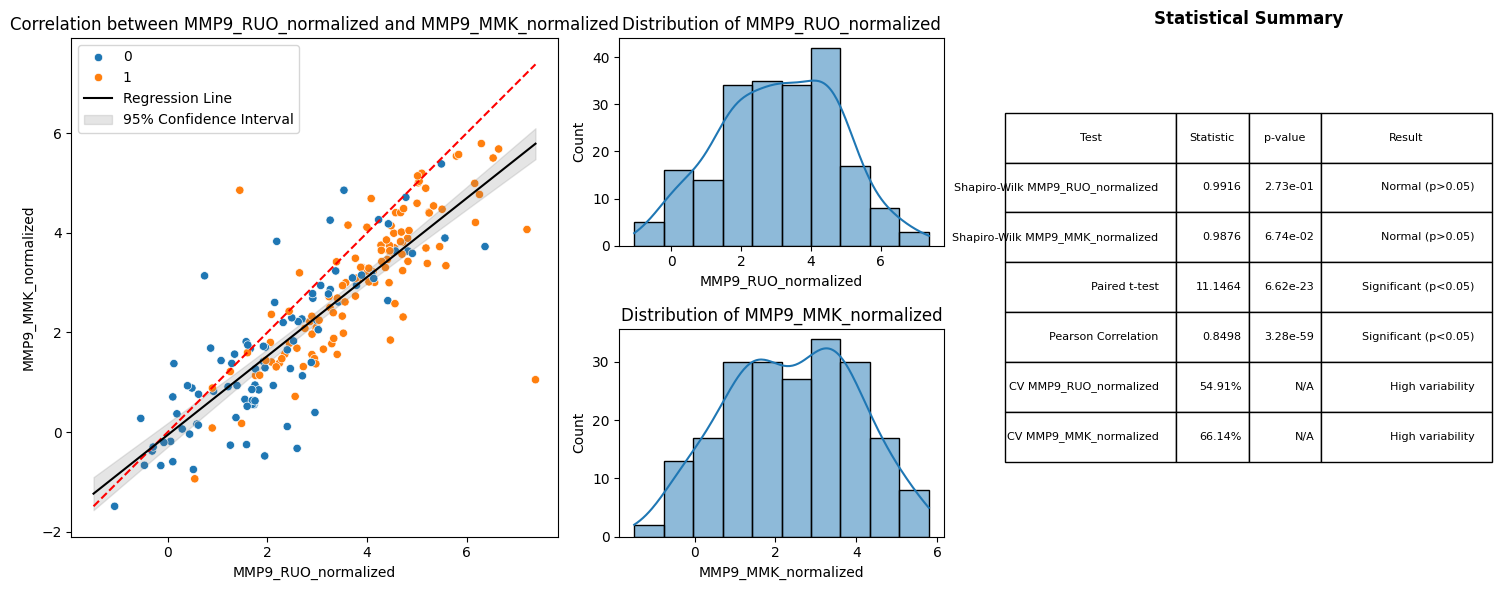

In [28]:
utils.plot_biomarker_correlation(df_merged.dropna(subset=['MMP9_RUO_normalized', 'MMP9_MMK_normalized']), 'MMP9_RUO_normalized', 'MMP9_MMK_normalized')

After normalizing, this biomarker readouts present normal distributions. The paired t-test is significant and the correlation (Pearson in this case) is very good. Sayd that, biomarker readouts still present a high coefficient of variablity. 

In [29]:
# @todo: use normalized values
df_merged['MMP9_diff'] = df_merged['MMP9_RUO_normalized']-df_merged['MMP9_MMK_normalized']
df_MMP9_outliers = df_merged[abs(df_merged['MMP9_diff'])>2][['Pathology', 'MMP9_RUO_normalized', 'MMP9_MMK_normalized', 'MMP9_diff']]
df_MMP9_outliers.sort_values(by='MMP9_diff')

,Pathology,MMP9_RUO_normalized,MMP9_MMK_normalized,MMP9_diff
Sample,,,,
829,1,1.445502,4.852779,-3.407277
438,0,0.738795,3.135494,-2.396699
1124,1,5.581288,3.338209,2.243078
ICO4,0,2.398078,0.110916,2.287162
561,1,4.722457,2.308965,2.413492
962,0,1.945382,-0.479244,2.424626
952,0,2.953760,0.392880,2.560880
1077,1,4.467022,1.846091,2.620931
1249,0,6.366246,3.722168,2.644078


## HSPB1

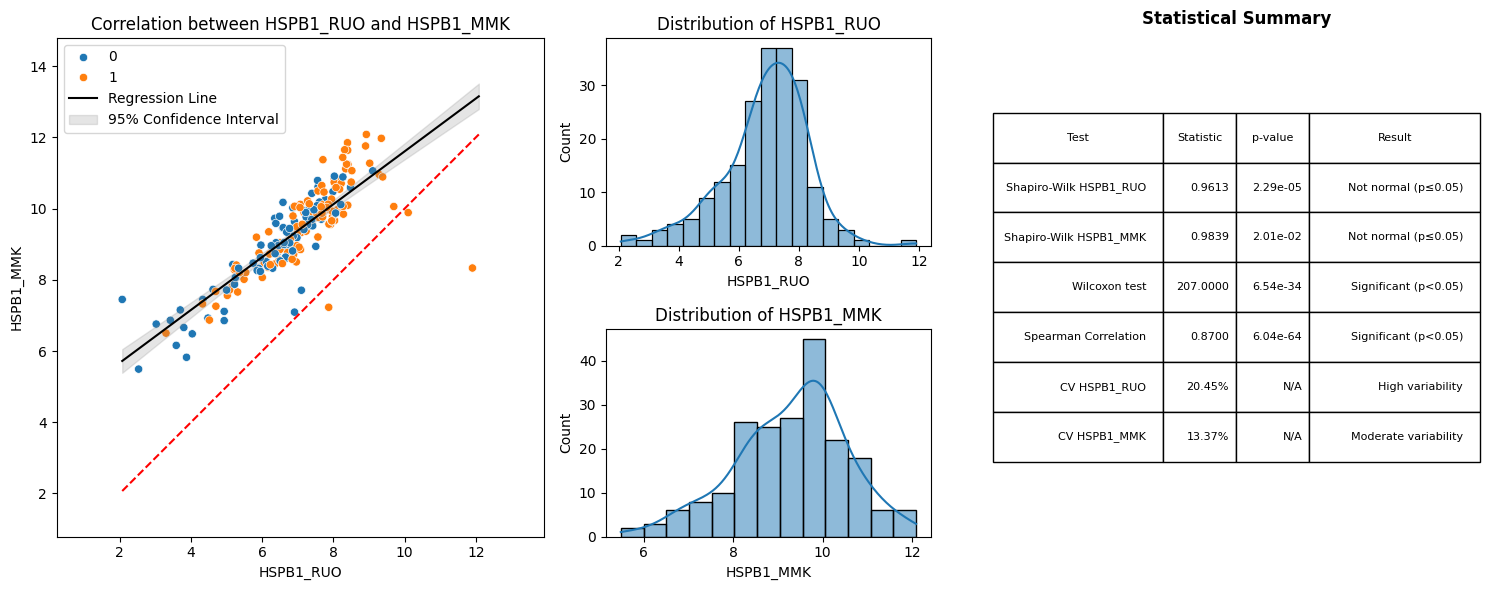

In [30]:
utils.plot_biomarker_correlation(df_merged.dropna(subset=['HSPB1_RUO', 'HSPB1_MMK']), 'HSPB1_RUO', 'HSPB1_MMK')

Once again, the slope being <1 is an indicator of the decrease of AUC.

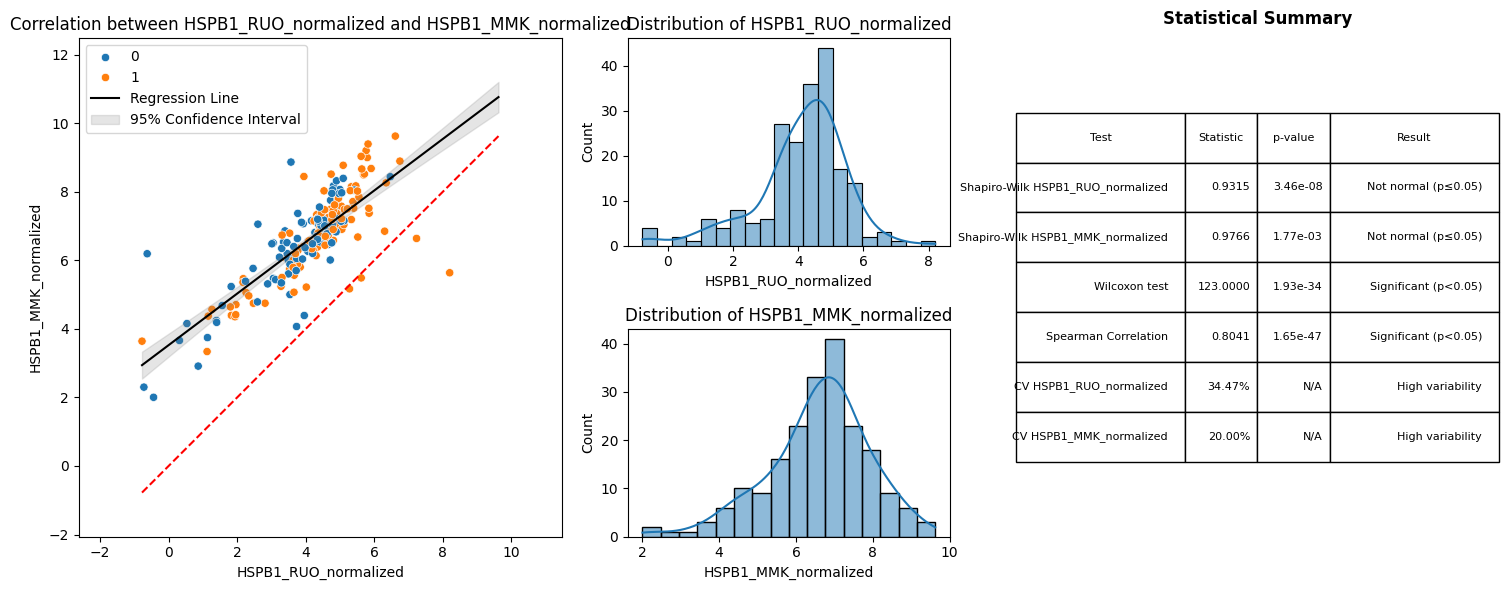

In [31]:
utils.plot_biomarker_correlation(df_merged.dropna(subset=['HSPB1_RUO_normalized', 'HSPB1_MMK_normalized']), 'HSPB1_RUO_normalized', 'HSPB1_MMK_normalized')

The normalized version presents as well a good correlation (Spearman, being not normal the distributions) but with high variability.

In [32]:
# Here the readouts have a difference centered around -3, then we are taking it as the intercept
df_merged['HSBP1_diff'] = df_merged['HSPB1_RUO_normalized']-df_merged['HSPB1_MMK_normalized']+3
df_HSPB1_outliers = df_merged[abs(df_merged['HSBP1_diff'])>2][['Pathology', 'HSBP1_diff']]
df_HSPB1_outliers.sort_values(by='HSBP1_diff')


,Pathology,HSBP1_diff
Sample,,
1302,0,-3.818818
438,0,-2.297816
638,1,2.452687
956,0,2.567427
995,0,2.664384
1436,1,3.108807
LL87,1,3.131878
762,1,3.594907
519,1,5.563277


## Analizing the outliers

Let's see if there are commonalities between the outliers

In [33]:
list(set(df_PERM_outliers.index) & set(df_MMP9_outliers.index) & set(df_HSPB1_outliers.index))

['LL87']

In [34]:
list(set(df_PERM_outliers.index) & set(df_MMP9_outliers.index))

['962', '929', 'LL87']

In [35]:
list(set(df_PERM_outliers.index) & set(df_HSPB1_outliers.index))

['762', '956', 'LL87']

In [36]:
list(set(df_HSPB1_outliers.index) & set(df_MMP9_outliers.index))

['LL87', '995', '438']

There is a few outliers shared between two biomarkers but not the 3 of them, excluding them won't change any AUC significatively if we remove them from the analysis.

Just in case, let's do it.

### Computing the MMK AUCs excluding outliers


In [37]:
RESULTS_PATH_no_outliers = '../data/results/240_no_outliers'

df_240_mmk_2024_no_outliers = df_240_mmk_2024.drop(index=['LL87', '929', '1112', '962', '956'])

models_240_no_outliers = utils.compute_all_models_and_save(
                            df=df_240_mmk_2024_no_outliers,
                            biomarkers=BIOMARKERS_240_MMK,
                            normalizing_col='TP_2024', 
                            volume_col= None,
                            apply_log=True,
                            avoid_same_biomarker=True,
                            methods=METHODS,
                            max_biomarker_count=1,
                            folder_name=RESULTS_PATH_no_outliers,
                            plot_rocs=False,
                            auc_threshold=0.4
                            )

In [38]:
# Direct method
pd.read_csv(RESULTS_PATH_no_outliers+'/direct/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']].head(n=10)

,Biomarker_1,AUC
0,MMP9_MMK,0.81637
1,PERM_MMK,0.79481
2,KPYM_MMK,0.78170
3,AGRIN_MMK,0.74200
4,HSPB1_MMK,0.63914


In [39]:
#Normalized method
pd.read_csv(RESULTS_PATH_no_outliers+'/normalized/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']].head(n=10)

,Biomarker_1,AUC
0,MMP9_MMK,0.76807
1,PERM_MMK,0.73920
2,KPYM_MMK,0.71856
3,AGRIN_MMK,0.69938
4,HSPB1_MMK,0.58084


No significant changes are observed.

### Computing the MMK AUCs using 2022 [TP] as normalizing col


In [40]:
RESULTS_PATH_tp_2022 = '../data/results/240_tp_2022'

models_240_no_outliers = utils.compute_all_models_and_save(
                            df=df_240_mmk_2024,
                            biomarkers=BIOMARKERS_240_MMK,
                            normalizing_col='TP_2022', 
                            volume_col= None,
                            apply_log=True,
                            avoid_same_biomarker=True,
                            methods=METHODS,
                            max_biomarker_count=1,
                            folder_name=RESULTS_PATH_tp_2022,
                            plot_rocs=False,
                            auc_threshold=0.4
                            )

In [41]:
pd.read_csv(RESULTS_PATH_tp_2022+'/normalized/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']].head(n=10)

,Biomarker_1,AUC
0,MMP9_MMK,0.78623
1,PERM_MMK,0.76142
2,KPYM_MMK,0.75088
3,AGRIN_MMK,0.70938
4,HSPB1_MMK,0.59851


A little better, but still below.

In [42]:
pd.read_csv(RESULTS_PATH_MMK+'/normalized/max_1.csv', sep=',', header=0)[['Biomarker_1','AUC']].head(n=10)

,Biomarker_1,AUC
0,MMP9_MMK,0.77079
1,PERM_MMK,0.73968
2,KPYM_MMK,0.71404
3,AGRIN_MMK,0.69282
4,HSPB1_MMK,0.57531


# Extra analyses for EIC deliverable

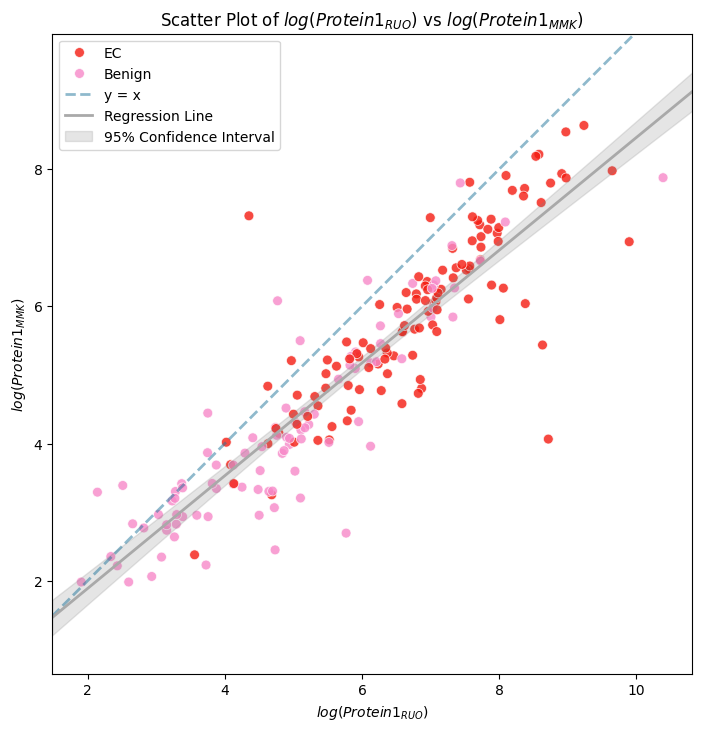

In [51]:
# MMP9 = Protein 1
utils.plot_biomarkers_scatterplot(df_merged.dropna(subset=['MMP9_RUO', 'MMP9_MMK']), 
                                 'MMP9_RUO', 
                                 'MMP9_MMK',
                                 target_col='Pathology',
                                 label_x='$log(Protein1_{RUO})$',
                                 label_y='$log(Protein1_{MMK})$')

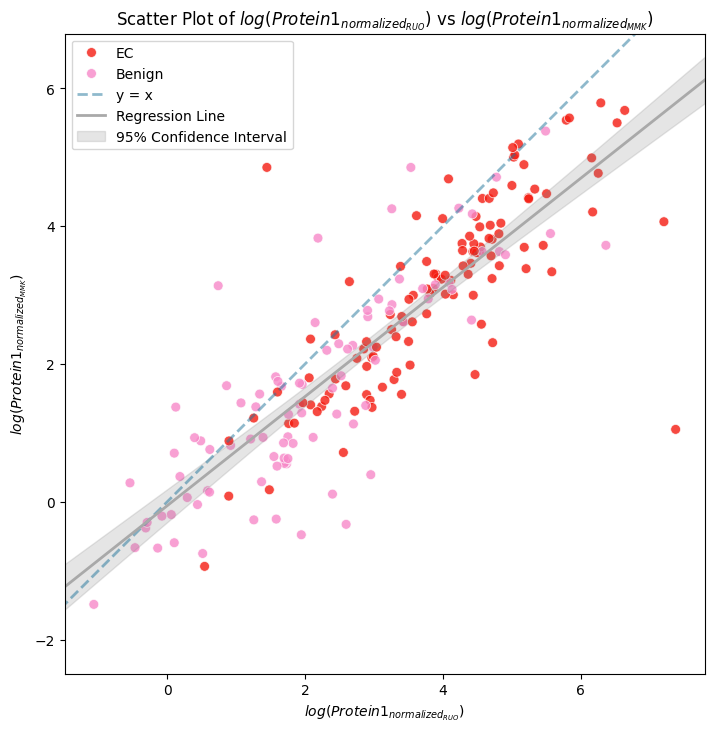

In [52]:
# MMP9 = Protein 1
utils.plot_biomarkers_scatterplot(df_merged.dropna(subset=['MMP9_RUO_normalized', 'MMP9_MMK_normalized']), 
                                 'MMP9_RUO_normalized', 
                                 'MMP9_MMK_normalized',
                                 target_col='Pathology',
                                 label_x='$log(Protein1_{normalized_{RUO}})$',
                                 label_y='$log(Protein1_{normalized_{MMK}})$')

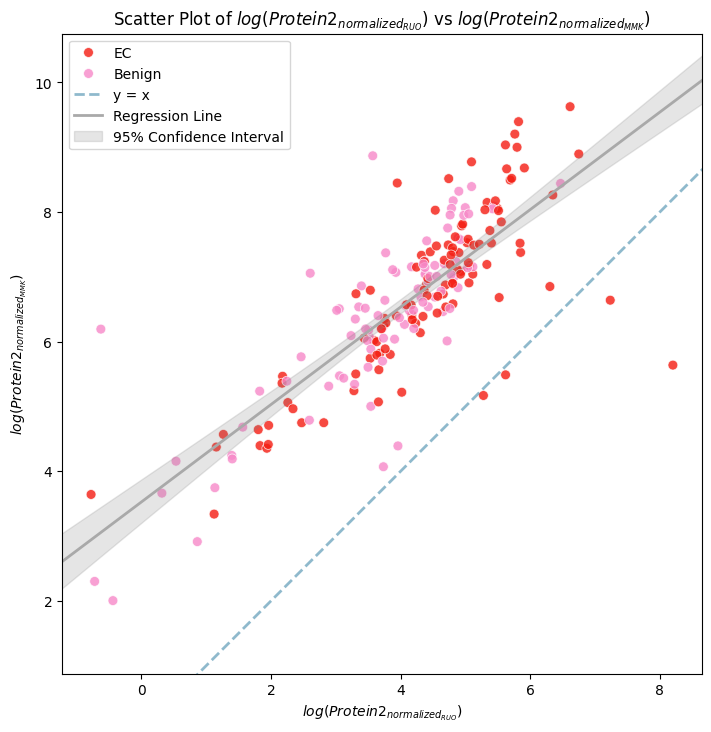

In [54]:
# HSBP1 = Protein 2
utils.plot_biomarkers_scatterplot(df_merged.dropna(subset=['HSPB1_RUO_normalized', 'HSPB1_MMK_normalized']), 
                                 'HSPB1_RUO_normalized', 
                                 'HSPB1_MMK_normalized',
                                 target_col='Pathology',
                                 label_x='$log(Protein2_{normalized_{RUO}})$',
                                 label_y='$log(Protein2_{normalized_{MMK}})$')

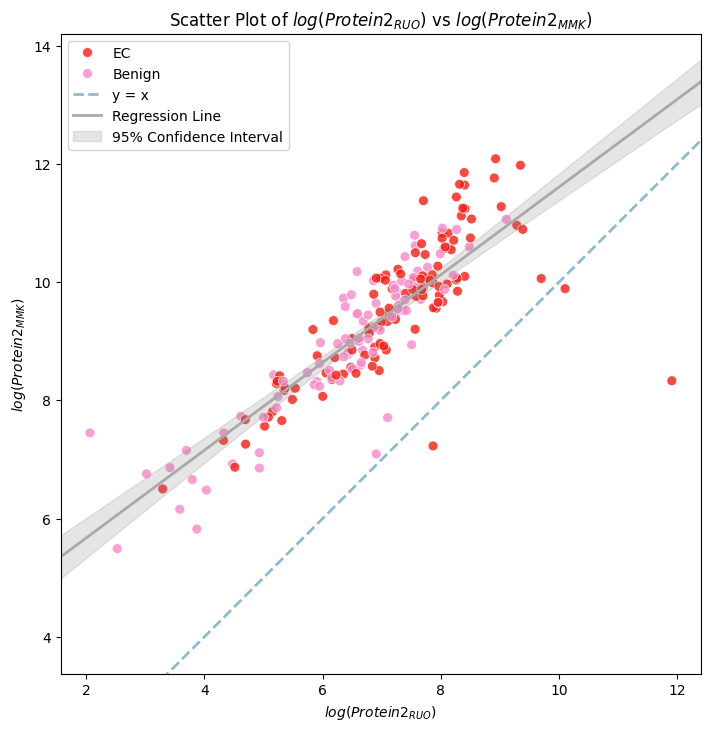

In [55]:
# HSBP1 = Protein 2
utils.plot_biomarkers_scatterplot(df_merged.dropna(subset=['HSPB1_RUO', 'HSPB1_MMK']), 
                                 'HSPB1_RUO', 
                                 'HSPB1_MMK',
                                 target_col='Pathology',
                                 label_x='$log(Protein2_{RUO})$',
                                 label_y='$log(Protein2_{MMK})$')

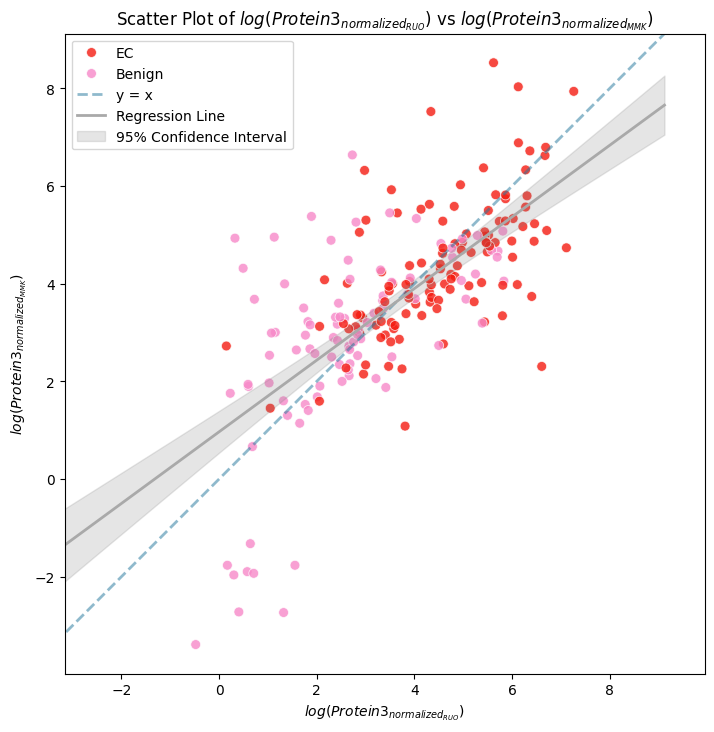

In [57]:
# PERM = Protein 3
utils.plot_biomarkers_scatterplot(df_merged.dropna(subset=['PERM_RUO_normalized', 'PERM_MMK_normalized']), 
                                 'PERM_RUO_normalized', 
                                 'PERM_MMK_normalized',
                                 target_col='Pathology',
                                 label_x='$log(Protein3_{normalized_{RUO}})$',
                                 label_y='$log(Protein3_{normalized_{MMK}})$')

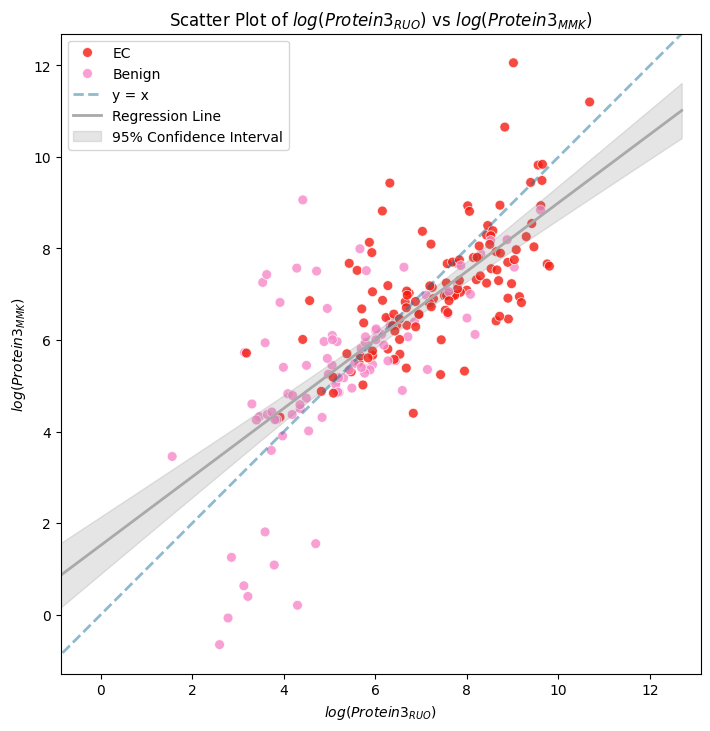

In [58]:
# PERM = Protein 3
utils.plot_biomarkers_scatterplot(df_merged.dropna(subset=['PERM_RUO', 'PERM_MMK']), 
                                 'PERM_RUO', 
                                 'PERM_MMK',
                                 target_col='Pathology',
                                 label_x='$log(Protein3_{RUO})$',
                                 label_y='$log(Protein3_{MMK})$')